## **I. Introduction**

**TOPIK**  
Penerapan Natural Language Processing (NLP) dengan Model TF-IDF untuk Rekomendasi Pekerjaan Berdasarkan Analisis Deskripsi Lowongan

**PROBLEM STATEMENT**  
Permasalahan yang diangkat dalam penelitian ini adalah bagaimana membangun sistem rekomendasi pekerjaan berbasis Natural Language Processing (NLP) yang mampu mencocokkan keterampilan pengguna dengan deskripsi lowongan kerja secara akurat. Banyak pencari kerja yang memiliki keterampilan tertentu namun masih kesulitan menemukan posisi yang sesuai dengan kemampuan mereka. Oleh karena itu, sistem ini dirancang untuk menganalisis deskripsi pekerjaan dari berbagai industri dan memberikan rekomendasi pekerjaan yang relevan beserta tautan lowongan yang tersedia.

**TUJUAN**  
Project ini bertujuan untuk mengembangkan sistem rekomendasi pekerjaan berbasis Natural Language Processing (NLP) dengan metode Term Frequency–Inverse Document Frequency (TF-IDF) yang dapat:
1. Menganalisis dan memproses data deskripsi pekerjaan untuk mengekstraksi keterampilan dan kompetensi utama yang dibutuhkan.
2. Menyesuaikan keterampilan yang dimasukkan oleh pengguna dengan deskripsi pekerjaan yang paling relevan.
3. Memberikan rekomendasi posisi pekerjaan beserta tautan lowongan (job link) yang sesuai dengan profil pengguna.  

Sistem ini diharapkan dapat membantu pencari kerja menemukan pekerjaan yang tepat dan meningkatkan efisiensi proses pencarian kerja melalui analisis berbasis teks yang cerdas.

**LATAR BELAKANG**  
Mencari pekerjaan di era modern bukanlah hal yang mudah. Banyak individu yang memiliki keterampilan tertentu, tetapi masih kebingungan menentukan bidang pekerjaan yang tepat atau menghadapi kesulitan menemukan posisi yang sesuai. Sementara itu, dunia kerja terus berkembang dengan munculnya profesi baru dan perubahan kebutuhan industri yang cepat.
Menanggapi hal ini, diperlukan sebuah sistem cerdas yang dapat membantu pencari kerja memahami peluang karier berdasarkan keterampilan yang mereka miliki. Pendekatan berbasis Natural Language Processing (NLP) dapat dimanfaatkan untuk menganalisis deskripsi pekerjaan dan memetakan hubungan antar-keterampilan, sehingga dapat digunakan untuk membangun sistem rekomendasi karier yang bersifat adaptif dan kontekstual.

**SUMBER DATASET**  
Dataset diperoleh melalui proses web scraping terhadap data pekerjaan dari 20 bidang industri yang diprediksi memiliki permintaan tinggi di masa depan, berdasarkan laporan World Economic Forum (WEF).
Sumber utama data berasal dari platform LinkedIn, yang merupakan jejaring profesional terbesar di dunia dengan lebih dari 1,1 miliar pengguna pada awal tahun 2025. Platform ini dipilih karena secara aktif menghubungkan penyedia pekerjaan dengan pencari kerja di berbagai sektor industri.

**DESKRIPSI DATASET**  
Dataset hasil web scraping berisi data lowongan pekerjaan dengan beberapa atribut utama, antara lain:
1. Job Title – Nama atau posisi pekerjaan yang ditawarkan.
2. Job Description – Deskripsi pekerjaan yang mencakup tanggung jawab dan kualifikasi.
3. Company Name – Nama perusahaan yang membuka lowongan.
4. Job Location – Lokasi atau area kerja.

**Alur Proses**  
Data ini akan diproses menggunakan teknik Natural Language Processing (NLP) untuk memahami konteks dan makna dari deskripsi pekerjaan serta keterampilan yang dibutuhkan. Selanjutnya, hasil analisis tersebut akan digunakan untuk membangun model rekomendasi karier yang mampu menyesuaikan profil pengguna (berdasarkan keterampilan yang diinput) dengan jenis pekerjaan yang paling relevan.

Sebagai contoh, jika pengguna memiliki keterampilan dalam data analysis dan Python programming, sistem akan merekomendasikan pekerjaan seperti Data Scientist, Business Analyst, atau AI Specialist.

Dengan demikian, sistem ini tidak hanya membantu pencari kerja menemukan pekerjaan yang sesuai, tetapi juga memberikan wawasan mengenai keterampilan tambahan yang perlu dikembangkan agar tetap kompetitif di masa depan.

## **II. Import Libraries**

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import contractions
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fastopic import FASTopic
from topmost import Preprocess

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')   
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

## **III. Load Data**

In [2]:
df = pd.read_csv('./Data/data_clean.csv')
df.head(5)

,company_name,job_location,job_title,job_description,job_url,lang
0,English 1,"Jakarta, Indonesia",Hiring Now! Entry-Level English Teacher (ESL) ...,About the job\nJoin English 1 (formerly EF Eng...,https://www.linkedin.com/jobs/search/?currentJ...,en
1,Path Finder Investment,Jakarta Metropolitan Area,Marketing Strategist,About the job\nMarketing Strategist\nThe Canop...,https://www.linkedin.com/jobs/search/?currentJ...,en
2,deVere Group,"Jakarta, Indonesia",Wealth Management Advisor - Jakarta,About the job\nJoin Our Team as a Financial Sa...,https://www.linkedin.com/jobs/search/?currentJ...,en
3,Media Minds,"Central Jakarta, Jakarta, Indonesia",Service Technician,About the job\nCompany Description\n AAA Tradi...,https://www.linkedin.com/jobs/search/?currentJ...,en
4,SLB,"North Cikarang, West Java, Indonesia",Sales Representative - Valve Services,About the job\nAbout Us\n\nWe are a global tec...,https://www.linkedin.com/jobs/search/?currentJ...,en


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company_name     3497 non-null   object
 1   job_location     3497 non-null   object
 2   job_title        3497 non-null   object
 3   job_description  3497 non-null   object
 4   job_url          3497 non-null   object
 5   lang             3497 non-null   object
dtypes: object(6)
memory usage: 164.0+ KB


In [4]:
print(df.duplicated().sum())

0


Informasi:
- Data sudah bersih dari duplikasi dan missing value

## **IV. Exploratory Data Analysis (EDA)**

In [5]:
# fungsi untuk tokenize text berdasarkan kalimat
def count_sentence(text):
    sentence_tokenized = sent_tokenize(text)
    sentence_len = len(sentence_tokenized)
    return sentence_len

# fungsi untuk tokenize text berdasarkan kata
def count_word(text):
    word_tokenized = word_tokenize(text)
    word_len = len(word_tokenized)
    return word_len

Menggunakan fungsi di atas, akan dibuat kolom baru yaitu **'sentence_length'** dan **'word_length'** yang berisi jumlah kalimat dan kata berdasarkan **sent_tokenize** dan **word_tokenize**

### a. Membuat Kolom Jumlah Kata dan Kalimat Setiap Job Title

In [6]:
df['sentence_length'] = df['job_title'].apply(count_sentence)
df['word_length'] = df['job_title'].apply(count_word)
df.head()

,company_name,job_location,job_title,job_description,job_url,lang,sentence_length,word_length
0,English 1,"Jakarta, Indonesia",Hiring Now! Entry-Level English Teacher (ESL) ...,About the job\nJoin English 1 (formerly EF Eng...,https://www.linkedin.com/jobs/search/?currentJ...,en,2,15
1,Path Finder Investment,Jakarta Metropolitan Area,Marketing Strategist,About the job\nMarketing Strategist\nThe Canop...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,2
2,deVere Group,"Jakarta, Indonesia",Wealth Management Advisor - Jakarta,About the job\nJoin Our Team as a Financial Sa...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,5
3,Media Minds,"Central Jakarta, Jakarta, Indonesia",Service Technician,About the job\nCompany Description\n AAA Tradi...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,2
4,SLB,"North Cikarang, West Java, Indonesia",Sales Representative - Valve Services,About the job\nAbout Us\n\nWe are a global tec...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,5


#### a.1. Rata-rata, minimal, dan maksimal jumlah kalimat

Pertama akan dilihat jumlah rata-rata, minimal, maksimal seluruh kalimat secara keseluruhan dan juga perbandingannya di setiap label.

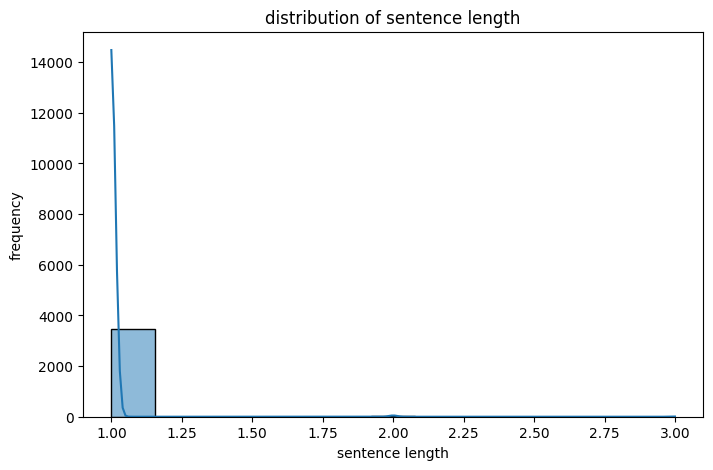

In [7]:
# Plotting histogram jumlah kalimat setiap job title
plt.figure(figsize=(8,5))
sns.histplot(df['sentence_length'], kde=True)
plt.title('distribution of sentence length')
plt.xlabel('sentence length')
plt.ylabel('frequency')
plt.show()

Pada kolom `job_title` menunjukkan bahwa sebagian besar judul pekerjaan dalam dataset terdiri dari satu kalimat.

Ini adalah karakteristik yang wajar untuk data judul pekerjaan.

In [8]:
# deskriptif kalimat
max_sentence = df['sentence_length'].max()
min_sentence = df['sentence_length'].min()
mean_sentence = df['sentence_length'].mean()

pd.DataFrame({
    '':['sentence'],
    'mean':[mean_sentence],
    'min':[min_sentence],
    'max':[max_sentence]
})

,,mean,min,max
0,sentence,1.004575,1,3


Dapat dilihat dari tabel di atas, rata-rata dataset memeliki 1 kalimat, dengan jumlah kalimat paling sedikit sebanyak 1 dan jumlah kalimat terbanyak adalah 3.

#### a.2. Rata-rata, minimal, dan maksimal jumlah kata

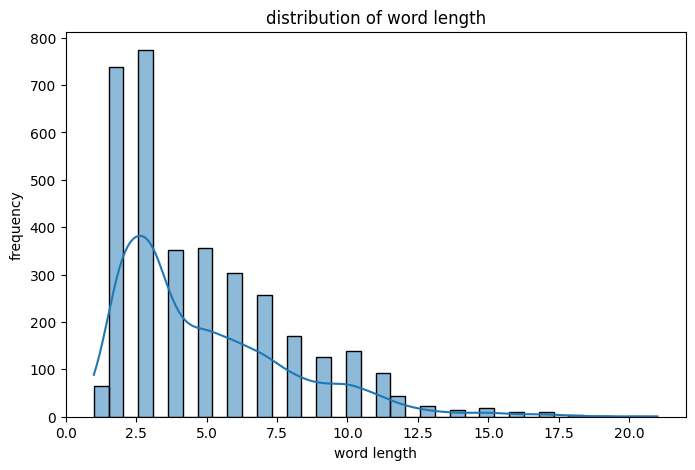

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['word_length'], kde=True)
plt.title('distribution of word length')
plt.xlabel('word length')
plt.ylabel('frequency')
plt.show()

- Distribusi miring ke kanan (right-skewed): Ini menunjukkan bahwa sebagian besar judul pekerjaan memiliki jumlah kata yang relatif sedikit.
- Terdapat beberapa judul pekerjaan yang lebih panjang, jumlahnya jauh lebih sedikit dibandingkan judul yang singkat.

In [10]:
# deskriptif kata
max_word = df['word_length'].max()
min_word = df['word_length'].min()
mean_word = df['word_length'].mean()

pd.DataFrame({
    '':['word'],
    'mean':[mean_word],
    'min':[min_word],
    'max':[max_word]
  })

,,mean,min,max
0,word,4.950529,1,21


-  Rata-rata jumlah kata dalam judul pekerjaan adalah sekitar 4.95.
- Jumlah kata paling sedikit dalam judul pekerjaan adalah 1
- Jumlah kata paling banyak dalam judul pekerjaan adalah 21.

### b. Membuat Kolom Jumlah Kata dan Kalimat Setiap Job Description

In [11]:
df['sentence_length_jd'] = df['job_description'].apply(count_sentence)
df['word_length_jd'] = df['job_description'].apply(count_word)
df.head()

,company_name,job_location,job_title,job_description,job_url,lang,sentence_length,word_length,sentence_length_jd,word_length_jd
0,English 1,"Jakarta, Indonesia",Hiring Now! Entry-Level English Teacher (ESL) ...,About the job\nJoin English 1 (formerly EF Eng...,https://www.linkedin.com/jobs/search/?currentJ...,en,2,15,17,475
1,Path Finder Investment,Jakarta Metropolitan Area,Marketing Strategist,About the job\nMarketing Strategist\nThe Canop...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,2,23,497
2,deVere Group,"Jakarta, Indonesia",Wealth Management Advisor - Jakarta,About the job\nJoin Our Team as a Financial Sa...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,5,17,299
3,Media Minds,"Central Jakarta, Jakarta, Indonesia",Service Technician,About the job\nCompany Description\n AAA Tradi...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,2,7,208
4,SLB,"North Cikarang, West Java, Indonesia",Sales Representative - Valve Services,About the job\nAbout Us\n\nWe are a global tec...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,5,32,577


#### b.1. Rata-rata, minimal, dan maksimal jumlah kalimat

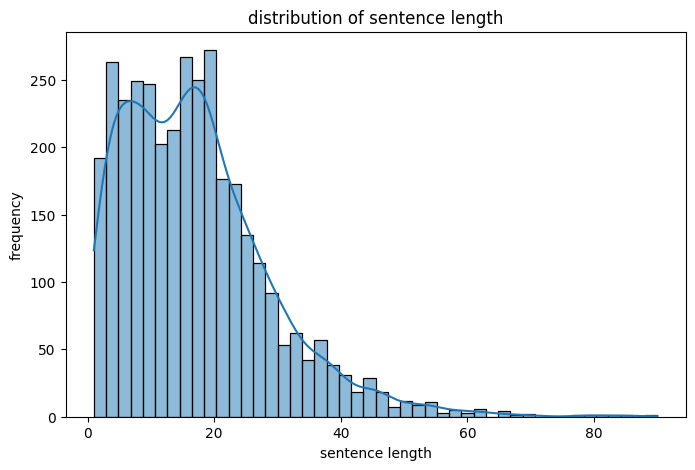

In [12]:
# Plotting histogram jumlah kalimat setiap description
plt.figure(figsize=(8,5))
sns.histplot(df['sentence_length_jd'], kde=True)
plt.title('distribution of sentence length')
plt.xlabel('sentence length')
plt.ylabel('frequency')
plt.show()

Berbeda dengan judul pekerjaan, jumlah kalimat dalam deskripsi pekerjaan sangat bervariasi.
- Puncak frekuensi di awal: Ada frekuensi yang lebih tinggi untuk deskripsi pekerjaan dengan jumlah kalimat yang sedikit.
- Ekor distribusi yang panjang ke kanan: Ini menunjukkan bahwa ada sejumlah deskripsi pekerjaan yang cukup panjang, terdiri dari banyak kalimat.

In [13]:
# deskriptif kalimat
max_sentence = df['sentence_length_jd'].max()
min_sentence = df['sentence_length_jd'].min()
mean_sentence = df['sentence_length_jd'].mean()

pd.DataFrame({
    '':['sentence_jd'],
    'mean':[mean_sentence],
    'min':[min_sentence],
    'max':[max_sentence]
})

,,mean,min,max
0,sentence_jd,17.050329,1,90


Dapat dilihat dari tabel di atas, rata-rata dataset memeliki 17 kalimat, dengan jumlah kalimat paling sedikit sebanyak 1 dan jumlah kalimat terbanyak adalah 90.

#### b.2. Rata-rata, minimal, dan maksimal jumlah kata

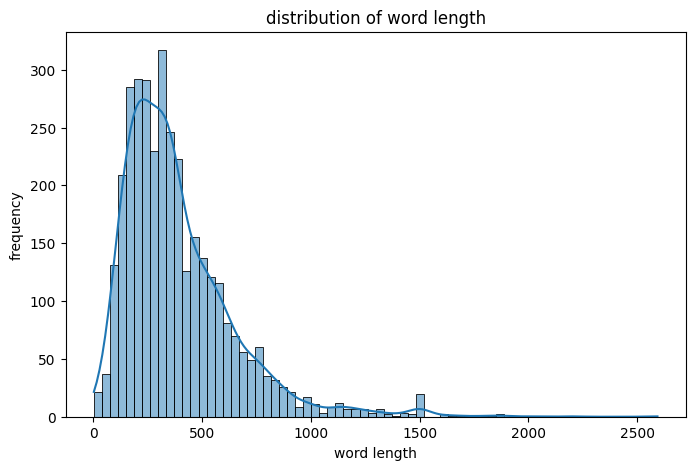

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['word_length_jd'], kde=True)
plt.title('distribution of word length')
plt.xlabel('word length')
plt.ylabel('frequency')
plt.show()

Mirip dengan panjang kalimat, jumlah kata dalam deskripsi pekerjaan juga sangat bervariasi.
- Sebagian besar deskripsi pekerjaan memiliki jumlah kata yang relatif sedikit (right-skewed)
- Ekor distribusi yang panjang ke kanan mengindikasikan adanya sejumlah deskripsi pekerjaan yang sangat panjang dan terdiri dari banyak kata.

In [15]:
# deskriptif kata
max_word = df['word_length_jd'].max()
min_word = df['word_length_jd'].min()
mean_word = df['word_length_jd'].mean()

pd.DataFrame({
    '':['word_jd'],
    'mean':[mean_word],
    'min':[min_word],
    'max':[max_word]
  })

,,mean,min,max
0,word_jd,389.46783,3,2593


-  Rata-rata jumlah kata dalam deskripsi pekerjaan adalah sekitar 389 kata.
- Jumlah kata paling sedikit dalam deskripsi pekerjaan adalah 3
- Jumlah kata paling banyak dalam deskripsi pekerjaan adalah 2593.

### c. Word Cloud

Word cloud digunakan untuk melihat beberapa kata yang mendominasi dari kolom job_description

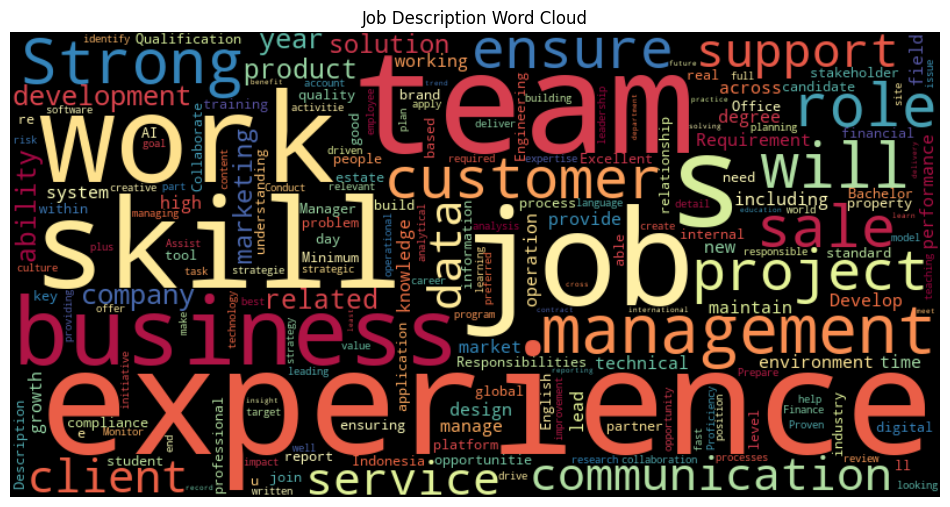

In [18]:
flatten_word_list = [
    x
    for xs in df['job_description'].apply(word_tokenize).tolist()
    for x in xs
]

all_text_raw = ' '.join(flatten_word_list)

wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='black', colormap="Spectral", random_state=20).generate(all_text_raw)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Job Description Word Cloud")
plt.show()

**Insight:**
1. Dominasi kata yang berhubungan dengan pengalaman dan kerja tim. Kata paling besar seperti “experience”, “team”, “work”, dan “job” menunjukkan bahwa pengalaman kerja dan kemampuan kolaborasi tim merupakan tema paling sering muncul di deskripsi pekerjaan. 
2. Banyak kata umum dan bentuk tidak bersih. Terdapat kata seperti “will”, “including”, “year”, “role”, dan “requirement”. Banyak kata fungsional (stopwords) dan variasi bentuk kata (misalnya “develop”, “development”, “developing”).

In [19]:
pd.DataFrame(flatten_word_list).value_counts()

0         
,             84683
and           72487
.             55843
to            33113
the           27588
              ...  
bulldozers        1
bulldozer         1
bulb              1
bulan             1
🧾                 1
Name: count, Length: 34257, dtype: int64

## **V. Preprocessing**
Akan digunakan dulu stopwords bahasa inggris yang telah didownload, lalu beberapa stopwords baru akan ditambahkan juga. Ditambahkan stopwords huruf "about", "the", dan "job" karena kata tersebut seringkali muncul di awal job_description. Juga dibuat objek lemmatizer untuk melakukan lemmatizing dan mengubah data menjadi kata dasarnya.

In [20]:
# Define Stopwords
stpwds_en = list(set(stopwords.words('english')))
stpwds_en = set(stpwds_en + ['about', 'the', 'job'])

# Define Stemmer
lemmatizer = WordNetLemmatizer()

Fungsi dibawah ini akan melakukan text preprocessing lowercase, memanjangkan singkatan kata dengan library contractions, menghapus new line, menghapus whitespace, menghapus karakter yang bukan huruf, tokenisasi teks, menghapus kata dari stopwords, dan lemmatization.

In [21]:
# Fungsi teks preprocessing
def get_wordnet_pos(tag):
  if tag.startswith('J'):  
      return 'a'
  elif tag.startswith('V'):  
      return 'v'
  elif tag.startswith('N'):  
      return 'n'
  elif tag.startswith('R'):  
      return 'r'
  else:
      return 'n'  
    
def lemmatize_text(token_list, lemmatizer_object):
  tagged_tokens = pos_tag(token_list)

  lemmatized_sentence = []

  for word, tag in tagged_tokens:
      lemmatized_sentence.append(lemmatizer_object.lemmatize(word, get_wordnet_pos(tag)))

  return lemmatized_sentence

def text_preprocessing(text, stpwds, lemmatizer_obj):
  # Huruf kecil
  text = text.lower()

  # perpanjang contractions
  text = contractions.fix(text)

  # Newline
  text = re.sub(r"\n", " ", text)

  # Whitespace
  text = text.strip()

  # Non-letter
  text = re.sub(r"[^A-Za-z\s]", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  no_stopwords_list = []
  for word in tokens:
     if word not in stpwds and len(word) > 1:
        no_stopwords_list.append(word)

  tokens = no_stopwords_list

  # Lemmatize
  tokens = lemmatize_text(tokens, lemmatizer_obj)

  # Stopwords removal
  no_stopwords_list = []
  for word in tokens:
     if word not in stpwds and len(word) > 1:
        no_stopwords_list.append(word)

  tokens = no_stopwords_list

  # Gabungkan Tokens
  text = ' '.join(tokens)

  return text

In [22]:
# Memanggil fungsi text_preprocessing
df['job_description_processed'] = df['job_description'].apply(lambda x: text_preprocessing(x, stpwds_en, lemmatizer))
df.head(5)

,company_name,job_location,job_title,job_description,job_url,lang,sentence_length,word_length,sentence_length_jd,word_length_jd,job_description_processed
0,English 1,"Jakarta, Indonesia",Hiring Now! Entry-Level English Teacher (ESL) ...,About the job\nJoin English 1 (formerly EF Eng...,https://www.linkedin.com/jobs/search/?currentJ...,en,2,15,17,475,join english formerly ef english first teach c...
1,Path Finder Investment,Jakarta Metropolitan Area,Marketing Strategist,About the job\nMarketing Strategist\nThe Canop...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,2,23,497,market strategist canopy room jakarta indonesi...
2,deVere Group,"Jakarta, Indonesia",Wealth Management Advisor - Jakarta,About the job\nJoin Our Team as a Financial Sa...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,5,17,299,join team financial sale consultant jakarta of...
3,Media Minds,"Central Jakarta, Jakarta, Indonesia",Service Technician,About the job\nCompany Description\n AAA Tradi...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,2,7,208,company description aaa trading service trust ...
4,SLB,"North Cikarang, West Java, Indonesia",Sales Representative - Valve Services,About the job\nAbout Us\n\nWe are a global tec...,https://www.linkedin.com/jobs/search/?currentJ...,en,1,5,32,577,global technology company drive energy innovat...


## **VI. EDA Setelah PreProcessing**

### **Word Cloud**

Word cloud digunakan untuk melihat beberapa kata yang mendominasi dari kolom job_description

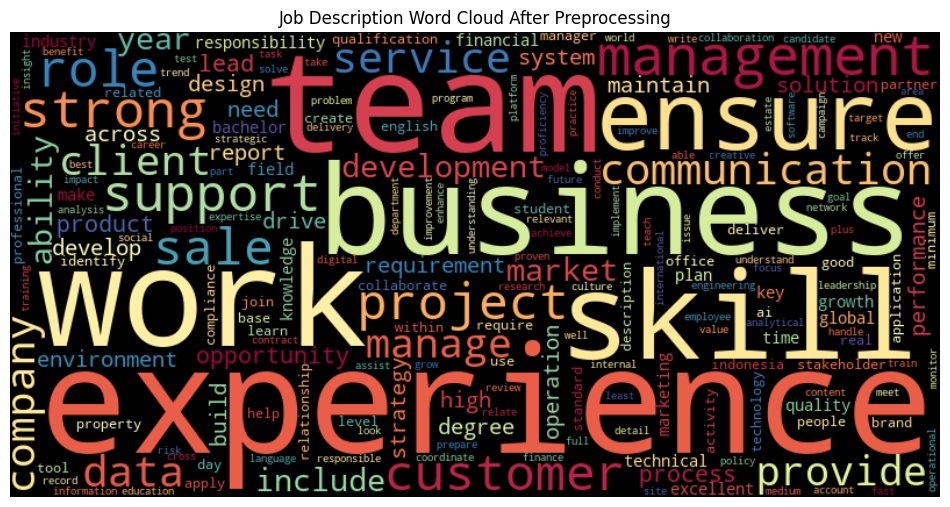

In [35]:
flatten_word_list = [
    x
    for xs in df['job_description_processed'].apply(word_tokenize).tolist()
    for x in xs
]

all_text_raw = ' '.join(flatten_word_list)

wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='black', colormap="Spectral", random_state=20).generate(all_text_raw)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Job Description Word Cloud After Preprocessing")
plt.show()

**Insight:**
1. Fokus makna lebih tajam dan bersih. Kata-kata seperti “will”, “including”, “requirement.” yang sebelumnya muncul telah hilang. Hasilnya, word cloud kini berisi kata-kata bermakna substantif, sehingga lebih representatif untuk analisis tema pekerjaan.
2. Tema dominan: pengalaman, keterampilan, dan kerja tim. Kata “experience”, “skill”, “team”, dan “work” tetap paling besar — menegaskan bahwa pengalaman dan kolaborasi tetap menjadi pilar utama yang dicari perusahaan. Namun sekarang fokusnya lebih rapi tanpa gangguan kata-kata umum, menandakan bahwa preprocessing berhasil mempertajam insight.

In [36]:
pd.DataFrame(flatten_word_list).value_counts()

0              
experience         8468
team               7537
work               7391
business           5826
skill              5395
                   ... 
clinch                1
regionalisms          1
esora                 1
lupa                  1
hangecbhjarnong       1
Name: count, Length: 16965, dtype: int64

## **VII. TF-IDF Vectorization**

In [27]:
# Ubah kolom menjadi list string untuk TF-IDF
corpus = df['job_description_processed'].astype(str).tolist()

# TF-IDF Vectorizer untuk membentuk representasi vektor dokumen
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Fit dan transform seluruh corpus
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))

## **VIII. Mendefinisikan Fungsi Input User dan Rekomendasi**

### a. Preprocessing Input User

In [28]:
# Fungsi untuk preprocessing teks input pengguna
def preprocess_input_text(text):
    return text_preprocessing(text, stpwds_en, lemmatizer)

# Fungsi untuk mengubah input pengguna menjadi vektor TF-IDF
def get_sentence_vector(sentence):
    preprocessed = preprocess_input_text(sentence)
    sentence_vector = tfidf_vectorizer.transform([preprocessed])
    return sentence_vector

### b. Rekomendasi Pekerjaan

In [29]:
# Fungsi utama untuk merekomendasikan pekerjaan berdasarkan kemiripan konten
def recommend_jobs(user_input, top_n=20):
    # Preprocess & ubah input ke bentuk vektor
    input_vector = get_sentence_vector(user_input)

    # Hitung kesamaan kosinus antara input dan semua deskripsi pekerjaan
    similarities = cosine_similarity(input_vector, tfidf_matrix).flatten()

    # Ambil N hasil teratas
    top_indices = similarities.argsort()[-top_n:][::-1]

    # Ambil informasi pekerjaan yang sesuai
    recommendations = df.iloc[top_indices][['job_title', 'company_name', 'job_url', 'job_description']].copy()
    
    # Tambahkan nilai similarity
    recommendations['similarity'] = similarities[top_indices]

    return recommendations

## **IX. Pengujian Fungsi Rekomendasi**

In [30]:
# Contoh input dari user
user_input = "communication, team building"

# Ambil 20 rekomendasi teratas
df_result = recommend_jobs(user_input, top_n=20)

# Cek apakah hasil kosong atau semua similarity = 0
if df_result.empty or (len(df_result['similarity'].unique()) == 1 and df_result['similarity'].unique()[0] == 0):
    print("Maaf, tidak ada pekerjaan yang sesuai dengan query Anda.")
else:
    # Tampilkan hasil rekomendasi
    print(df_result)

    # Contoh: akses URL pekerjaan ke-3
    print(df_result['job_url'].iloc[2])

                                              job_title  \
1365                                  Online Specialist   
1582                              Healthcare Specialist   
2308                          Assistant Project Manager   
251                               IT Support Specialist   
765                               Graphic Design Intern   
712                       Officer Regulatory Reporting    
696                                Lead Mobile Engineer   
2411                              Partnership Executive   
1894                              Commercial Consultant   
1155                     Umbrella Brand Senior Manager    
352   VP, Branch Business Manager, Consumer Banking ...   
926   VP, Branch Business Manager, Consumer Banking ...   
1991                       Property Manager (Township)    
1381                                   Country Director   
2761                                   Country Director   
2807                   Senior Executive, Communications 

## **X. Analisis Similarity & Job Title (Top 20)**

In [31]:
# Hitung kesamaan TF-IDF 
input_vector = get_sentence_vector(user_input)
result = cosine_similarity(input_vector, tfidf_matrix)[0]

# Ambil 20 pekerjaan paling mirip
max_index = result.argsort()[-20:][::-1].tolist()
print(max_index)

[1365, 1582, 2308, 251, 765, 712, 696, 2411, 1894, 1155, 352, 926, 1991, 1381, 2761, 2807, 2061, 203, 669, 2268]


In [32]:
# Ambil dan normalisasi judul pekerjaan
job_title_df = df.loc[max_index, 'job_title']
job_title_df = job_title_df.reset_index()
job_title_df['job_title'] = job_title_df['job_title'].str.lower()
job_title_df

,index,job_title
0,1365,online specialist
1,1582,healthcare specialist
2,2308,assistant project manager
3,251,it support specialist
4,765,graphic design intern
5,712,officer regulatory reporting
6,696,lead mobile engineer
7,2411,partnership executive
8,1894,commercial consultant
9,1155,umbrella brand senior manager


## **XI. Clustering Judul Pekerjaan (Topik Modeling)**

In [33]:
# FASTopic digunakan untuk mengelompokkan pekerjaan berdasarkan topik (judul)
# Misalnya: 3 topik utama
model = FASTopic(3)

# Fit model ke data job_title
top_words, doc_topic_dist = model.fit_transform(job_title_df['job_title'])

# Tambahkan hasil clustering
job_title_df['cluster'] = np.argmax(doc_topic_dist, axis=1)
job_title_df['cluster_probs'] = np.max(doc_topic_dist, axis=1)

# Urutkan berdasarkan cluster
job_title_df = job_title_df.sort_values('cluster')
job_title_df

parsing texts: 100%|██████████| 20/20 [00:00<00:00, 20030.11it/s]
c:\Users\ASUS\anaconda3\envs\h8_env\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

Training FASTopic: 100%|██████████| 200/200 [00:09<00:00, 20.82it/s]


,index,job_title,cluster,cluster_probs
19,2268,property manager,0,0.567369
16,2061,executive property manager,0,0.610011
15,2807,"senior executive, communications",0,0.497905
12,1991,property manager (township),0,0.600958
11,926,"vp, branch business manager, consumer banking ...",0,0.615138
10,352,"vp, branch business manager, consumer banking ...",0,0.615138
17,203,software engineer,1,0.548470
14,2761,country director,1,0.580051
13,1381,country director,1,0.580051
0,1365,online specialist,1,0.584289


## **XII. Kesimpulan** 

Proyek SkillMatch berhasil mengimplementasikan sistem rekomendasi pekerjaan berbasis Natural Language Processing (NLP) menggunakan metode TF-IDF (Term Frequency–Inverse Document Frequency) dan Cosine Similarity.
Melalui pendekatan ini, sistem mampu menganalisis keterampilan yang dimasukkan oleh pengguna dan mencocokkannya dengan deskripsi pekerjaan yang paling relevan dari berbagai industri.

Berdasarkan hasil pengujian, sistem dapat memberikan rekomendasi pekerjaan yang relevan sesuai dengan kata kunci atau keterampilan yang diinput, sekaligus menampilkan tautan langsung ke sumber lowongan asli (LinkedIn).
Selain itu, penerapan FASTopic Clustering membantu mengelompokkan pekerjaan ke dalam beberapa topik utama, sehingga pengguna dan pengembang dapat memperoleh wawasan tambahan mengenai tren dan pola kebutuhan industri berdasarkan teks deskripsi pekerjaan.

Secara keseluruhan, model ini menunjukkan bahwa pendekatan berbasis Content-Based Filtering dengan representasi teks TF-IDF efektif dalam membangun sistem rekomendasi karier yang sederhana namun fungsional.
Ke depan, sistem ini dapat ditingkatkan dengan integrasi model BERT atau Sentence Transformers agar mampu memahami konteks semantik yang lebih dalam dan menghasilkan rekomendasi yang semakin akurat serta personal bagi setiap pengguna.